<a href="https://colab.research.google.com/github/Dougllaspaiva/Projetos-datascience/blob/main/Analise_de_sentimento_por_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving depression_dataset_reddit_cleaned.csv to depression_dataset_reddit_cleaned (5).csv


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


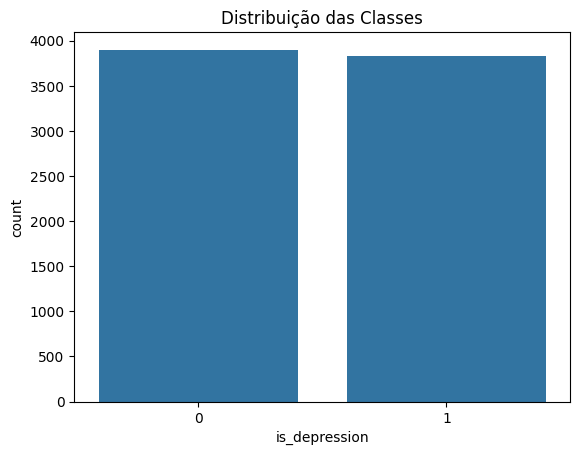

Acurácia: 0.8177117000646412
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       783
           1       0.73      0.99      0.84       764

    accuracy                           0.82      1547
   macro avg       0.86      0.82      0.81      1547
weighted avg       0.86      0.82      0.81      1547



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

display(df.head())

sns.countplot(x='is_depression', data=df)
plt.title("Distribuição das Classes")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['is_depression'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

predictions = model.predict(X_test_tfidf)
print("Acurácia:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
